<a href="https://colab.research.google.com/github/luperezsal/DaVincis/blob/master/Main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Da-Vincis

- [IberLEF Davincis](https://codalab.lisn.upsaclay.fr/competitions/2638)

- [DaVincis Home](https://sites.google.com/view/davincis-iberlef/home)

- [GitHub](https://github.com/luperezsal/DaVincis)

- [Transformer](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment)


DOCS:
- [CLS USE](https://engati.medium.com/bert-for-sentiment-analysis-of-chatbot-conversations-fbfdc392d68a)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'data/'
DATA_PATH = 'https://raw.githubusercontent.com/luperezsal/DaVincis/master/data/'

TRAINING_DATA_PATH = f"{DATA_PATH}training_data/"
TEST_DATA_PATH = f"{DATA_PATH}test_data/"

In [3]:
TASK = 2
# TASK = 2

# Load Data

In [4]:
text_col  = 'tweet'
class_col = 'incident'

# Train Data
X_train = pd.read_csv(f"{TRAINING_DATA_PATH}train_data.csv", names = [text_col])
Y_train_1 = pd.read_csv(f"{TRAINING_DATA_PATH}train_labels_subtask_1.csv", names = [class_col])
Y_train_2 = pd.read_csv(f"{TRAINING_DATA_PATH}train_labels_subtask_2.csv", header = None)

# Trial Data
X_trial = pd.read_csv(f"{TRAINING_DATA_PATH}trial_data.csv", names = [text_col])
Y_trial_1 = pd.read_csv(f"{TRAINING_DATA_PATH}trial_labels_subtask_1.csv", names = [class_col])
Y_trial_2 = pd.read_csv(f"{TRAINING_DATA_PATH}trial_labels_subtask_2.csv", header = None)

# Test Data
X_test = pd.read_csv(f"{TEST_DATA_PATH}test_data.csv", names = [text_col])

In [5]:
Y_train_2 = Y_train_2.idxmax(axis=1)
Y_trial_2 = Y_trial_2.idxmax(axis=1)

## Subtask 1

In [6]:
Y_train_1_labeled = Y_train_1.copy()

In [7]:
boolean_mask = Y_train_1 == 0
Y_train_1_labeled[class_col] = Y_train_1_labeled.mask(boolean_mask, 'Violent')

boolean_mask = Y_train_1 == 1
Y_train_1_labeled[class_col] = Y_train_1_labeled.mask(boolean_mask, 'Non Violent')

Y_train_1_labeled = Y_train_1_labeled[class_col]

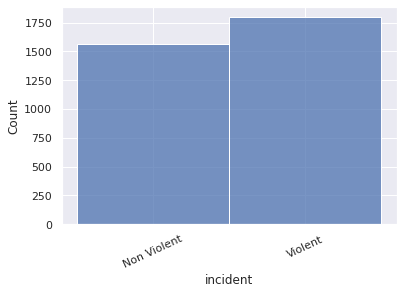

In [8]:
sns.set(style="darkgrid")
histogram = sns.histplot(Y_train_1_labeled)
histogram.tick_params(axis='x', rotation=25)

In [9]:
sample_index = Y_train_1_labeled[Y_train_1_labeled == 'Violent'].index[15]
print(f"None of the above: {X_train.loc[sample_index][text_col]}\n")

sample_index = Y_train_1_labeled[Y_train_1_labeled == 'Non Violent'].index[15]
print(f"None of the above: {X_train.loc[sample_index][text_col]}\n")

None of the above: #Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias  https://t.co/xXKSnVjz8k...  https://t.co/HcoPbEpPLk

None of the above: Cali es una trampa en la que uno no busca los accidentes ni que lo asalten a uno, esas dos cosas lo buscan a uno. Me referiré al accidente que me encontró ahora en la noche. Un hueco en un anden de Granada en el que quedé atrapado y casi me rompe el tobillo. Av 9A N con 16 Norte.  https://t.co/KNevmfuuRo



### Analysis

In [10]:
from ipywidgets import widgets
from IPython.display import display

text = widgets.Text()

## Subtask 2

### Analysis

In [11]:
Y_train_2_labeled = Y_train_2.copy()

A continuación se transforman las etiquetas de entrenamiento de forma `one-hot` a formato String para realizar una representación interpretable de las clases contenidas en el dataset.

In [12]:
Y_train_2_labeled[Y_train_2 == 0] = 'Accident'
Y_train_2_labeled[Y_train_2 == 1] = 'Homicide'
Y_train_2_labeled[Y_train_2 == 2] = 'None of the above'
Y_train_2_labeled[Y_train_2 == 3] = 'Theft'
Y_train_2_labeled[Y_train_2 == 4] = 'Kidnapping'

None of the above    1798
Accident             1125
Homicide              244
Theft                 157
Kidnapping             38
dtype: int64

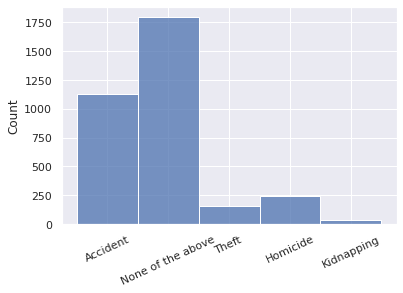

In [13]:
sns.set(style="darkgrid")
histogram = sns.histplot(Y_train_2_labeled)
histogram.tick_params(axis='x', rotation=25)

Y_train_2_labeled.value_counts()

In [14]:
sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Accident'].index[15]
print(f"Accident example: {X_train.loc[sample_index][text_col]}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Homicide'].index[15]
print(f"Homicide example: {X_train.loc[sample_index][text_col]}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'None of the above'].index[15]
print(f"None of the above: {X_train.loc[sample_index][text_col]}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Theft'].index[15]
print(f"Theft: {X_train.loc[sample_index][text_col]}\n")

sample_index = Y_train_2_labeled[Y_train_2_labeled == 'Kidnapping'].index[15]
print(f"Kidnapping: {X_train.loc[sample_index][text_col]}")

Accident example: Nuevo Accidente, carril izquierdo bloqueado en #SeDallas en la I-20 WB en JJ Lemmon Rd, deténgase y regrese el tráfico a Trinity River Brg  https://t.co/6XRbCfL48n

Homicide example: 📹 #VIDEOS | Ola de violencia en #Oaxaca: asesinan a magistrado, a una familia y a tres mujeres  https://t.co/CSgnsxcUD1  https://t.co/CgP46rgPLJ

None of the above: #Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias  https://t.co/xXKSnVjz8k...  https://t.co/HcoPbEpPLk

Theft: #02Julio #Comparte  ¡Ayudemos a recuperarlo!  La mañana de este viernes, se informó el robo de un vehículo Nissan, Tsuru, que es taxi del sitio Ejecutivo, con número económico 120, en la colonia Morelos de Jiutepec, con placas de circulación A671LTH.  https://t.co/RTs0mMjfkB

Kidnapping: Myron Eugene Johnson de 26 años está sie

# Resampling

In [15]:
train = X_train
train[class_col] = Y_train_1 if TASK == 1 else Y_train_2

Y_trial = Y_trial_1 if TASK == 1 else Y_train_2

In [16]:
from sklearn.utils import resample

if TASK == 2:

  accident_class  = train[train[class_col] == 0]
  homicide_class  = train[train[class_col] == 1]
  none_class   = train[train[class_col] == 2]
  theft_class  = train[train[class_col] == 3]
  kidnapping_class = train[train[class_col] == 4]

  zero_class_downsampled = resample(accident_class,
                                    replace=True,
                                    n_samples=len(accident_class),
                                    random_state=42)

  first_class_downsampled = resample(homicide_class,
                                      replace=True,
                                      n_samples=len(accident_class),
                                      random_state=42)

  second_class_downsampled = resample(none_class,
                                      replace=True,
                                      n_samples=len(accident_class),
                                      random_state=42)

  third_class_downsampled = resample(theft_class,
                                      replace=True,
                                      n_samples=len(accident_class),
                                      random_state=42)

  fourth_class_downsampled = resample(kidnapping_class,
                                      replace=True,
                                      n_samples=len(accident_class),
                                      random_state=42)


  train = pd.concat([zero_class_downsampled,
                    first_class_downsampled,
                    second_class_downsampled,
                    third_class_downsampled,
                    fourth_class_downsampled])

# Transformer

In [17]:
# instalar librerías. Esta casilla es últil por ejemplo si se ejecuta el cuaderno en Google Colab
# Note que existen otras dependencias como tensorflow, etc. que en este caso se encontrarían ya instaladas
%%capture
!pip install transformers==4.2.1

print('Done!')

## Configuration

In [18]:
cfg = {}  # diccionario para agrupar configuraciones y variables para su posterior uso
cfg['framework'] = 'tf'  # TensorFlow como framework (por cuestiones del formato en los datos)
cfg['max_length'] = 512  # máxima longitud de secuencia recomendada por DistilBERT
cfg['number_of_additional_features'] = 5076
cfg['num_labels'] = 1 if (TASK == 1) else 5

## Imports

In [19]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFAutoModel, TFAutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import plotly.figure_factory as ff



## Spanish Stop-Words

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

In [20]:
# función auxiliar para obtener tensores de entrada al modelo a partir del texto
def get_model_inputs(cfg, data):

  encodings = cfg['tokenizer'](data,
                               truncation = True,
                               padding = 'max_length',
                               max_length = cfg['max_length'],
                               return_tensors = cfg['framework']).data

  # obtener representación tf-idf de cada instancia
  tfidf = cfg['vectorizer'].transform(data)

  tfidf_t = tf.convert_to_tensor(tfidf.toarray(), dtype=tf.float32)

  inputs = {'input_ids': encodings['input_ids'],
            'attention_mask': encodings['attention_mask'],
            'tfidf': tfidf_t
            }
          
  return inputs

# función auxiliar para realizar predicciones con el modelo
def predict_model(model, cfg, data, pref='m'):
  """
  data: list of the text to predict
  pref: identificador para las columnas (labels_[pref], scores_[pref]_[class 1], etc.)
  """
  res = {}
  inputs = get_model_inputs(cfg, data)
  scores = model.predict(inputs)
  
  # empaquetar scores dentro de un diccionario que contiene labels, scores clase 1, scores clase 2, .... El nombre de la clase se normaliza a lowercase
  if cfg['num_labels']==1: # si es clasificación binaria, este modelo devuelve solo 1 score por instancia
    res = {f'scores_{pref}': scores[:,0]}
  else:
    res = {f'scores_X_{cls}': score for cls, score in zip(cfg['label_binarizer'].classes_, [col for col in scores.T])}

  # añadir datos relativos a la predicción
  labels = cfg['label_binarizer'].inverse_transform(scores)
  res[f'labels_X'] = labels

  # convertir a dataframe ordenando las columnas primero el label y luego los scores por clase, las clases ordenadas alfabeticamente
  res = pd.DataFrame(res, columns=sorted(list(res.keys())))
  return res




# función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_true, y_pred, y_score=None, pos_label='positive'):
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_true, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_true, y_pred)))

  # graficar matriz de confusión
  display_labels = sorted(unique_labels(y_true, y_pred), reverse=True)
  cm = confusion_matrix(y_true, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()


  # curva roc (definido para clasificación binaria)
  fig_roc = None
  if y_score is not None:
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    fig_roc = px.area(
        x=fpr, y=tpr,
        title = f'Curva ROC (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='Ratio Falsos Positivos', y='Ratio Verdaderos Positivos'),
        width=400, height=400
    )
    fig_roc.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)

    fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_roc.update_xaxes(constrain='domain')
    
    fig_roc.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def get_model_graph(cfg):
  # transformer = TFDistilBertModel.from_pretrained(cfg['transformer_model_name'], return_dict=False).distilbert
  transformer = TFAutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment",
                                                                     
                                                                     output_hidden_states = True)


  input_ids = tf.keras.layers.Input(shape=(cfg['max_length'],), name='input_ids', dtype='int32')


  input_masks = tf.keras.layers.Input(shape=(cfg['max_length'],), name='attention_mask', dtype='int32') 


  input_tfidf = tf.keras.layers.Input(shape = (cfg['number_of_additional_features'],),
                                      name = 'tfidf',
                                      dtype = 'float32') 

  transformer_output = transformer(input_ids,
                                    attention_mask = input_masks)

  last_hidden_state = transformer_output.hidden_states[-1]

  transformes_cls_embedding = tf.keras.layers.Lambda(lambda seq: seq[:,0,:], name='lambda')(last_hidden_state)

  # return last_hidden_state
  # concatenar embedding del token [CLS] con el vector de rasgos adicionales.
  features = tf.keras.layers.concatenate([transformes_cls_embedding, input_tfidf], name='concatenate')

  # establecer algunos hiper-parámetros del modelo
  initializer_range = 0.02
  hiden_units = 768
  seq_classif_dropout=0.2
  initializer = tf.keras.initializers.TruncatedNormal(stddev=initializer_range)

  # crear pre_classifier, establecer como su entrada los rasgos concatenados (features).
  pre_classifier = tf.keras.layers.Dense(hiden_units, kernel_initializer=initializer, activation='relu', name='pre_classifier')(features) 

  # crear dropout layer y establecer como su entrada la salida de pre_classifier.
  dropout_layer = tf.keras.layers.Dropout(rate=seq_classif_dropout, name='dropout')(pre_classifier)  

  # crear classifier layer y establecer como su entrada la salida de la capa dropout.
  classifier = tf.keras.layers.Dense(cfg['num_labels'], kernel_initializer=initializer, name='classifier')(dropout_layer)

  return input_ids, input_masks, input_tfidf, classifier

print('Done!')

# something = get_model_graph(cfg)

Done!


### Instanciar tokenizador, tf-idf vectorizer, etc.

In [22]:
from sklearn import preprocessing


cfg['tokenizer'] = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# instanciar TfidfVectorizer
cfg['vectorizer'] = TfidfVectorizer(stop_words = stopwords.words('spanish'),
                                    max_features = cfg['number_of_additional_features'])

# entrenar TfidfVectorizer
cfg['vectorizer'].fit(train[text_col].to_list())

cfg['label_binarizer'] = preprocessing.LabelBinarizer() 

# entrenar LabelBinarizer
cfg['label_binarizer'].fit(train[class_col])

LabelBinarizer()

### Transformar a onehot

In [23]:
# obtener codificación one-hot
train_blabels = cfg['label_binarizer'].transform(train[class_col])
trial_blabels = cfg['label_binarizer'].transform(Y_trial_2)

train_blabels_t = tf.convert_to_tensor(train_blabels, dtype='int32')
trial_blabels_t = tf.convert_to_tensor(trial_blabels, dtype='int32')

# obtener diccionarios representando las entradas del modelo
train_inputs = get_model_inputs(cfg, train[text_col].to_list())
trial_inputs = get_model_inputs(cfg, X_trial[text_col].to_list())

In [24]:
def configure_model(input_ids, input_masks, input_tfidf, classifier):
  # definir algoritmo de optimización
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

  # definir función loss. Debe cuidarse que sea coherente con la salida esperada del modelo (vector de num_labels elementos)
  # y el formato de los ejemplos (vector one-hot de num_labels componentes para codificar las categorías)
  if (TASK == 1):
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
  else :
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True) 

  # crear el modelo
  model = tf.keras.Model(inputs=[input_ids, input_masks, input_tfidf], outputs=classifier, name='distilbert-custom') # conectar todos los nodos en un modelo

  # compilar el modelo, indicando otras métricas que se desee monitorear
  # La métrica debe ser apropiada para el tipo de problema (clasificación binaria o multiclase)
  metric = ['binary_accuracy'] if (TASK == 1) else ['categorical_accuracy']

  model.compile(optimizer = optimizer,
                loss = loss,
                metrics = metric)

  return model

print('Done!')

Done!


In [25]:
input_ids, input_masks, input_tfidf, classifier = get_model_graph(cfg)
model = configure_model(input_ids, input_masks, input_tfidf, classifier)

# imprimir sumario del modelo 
model.summary()

# graficar el modelo (opcional)
# tf.keras.utils.plot_model(model) 

print('Done!')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "distilbert-custom"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  167360261  ['input_ids[0][0]',              
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'attention_mask[0][0]']         
 fication)                      logits=(N

## Train Model

In [28]:
from tqdm import tqdm

# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

epochs_max = 2
epochs_to_save = 1
batch_size = 8

# ciclo de entrenamiento y guardar checkpoints
for epoch in tqdm(range(0, epochs_max, epochs_to_save)):
    print('Training model, epochs {0} - {1}'.format(epoch+1, epoch+epochs_to_save))
    
    # entrenar el modelo. Opcionalmente, se puede suministrar datos de validación => validation_data=(val_inputs,val_blabels_t )
    model.fit(train_inputs,
              y = train_blabels_t,
              epochs = epochs_to_save,
              batch_size = batch_size,
              validation_data = (trial_inputs, trial_blabels_t))
    
    model.save_weights(f"task_{TASK}", save_format="tf")
    
print('Done!')

  0%|          | 0/2 [00:00<?, ?it/s]

Training model, epochs 1 - 1


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


704/704 [==============================] - ETA: 0s - loss: 0.9658 - categorical_accuracy: 0.6628

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


704/704 [==============================] - 689s 962ms/step - loss: 0.9658 - categorical_accuracy: 0.6628 - val_loss: 0.7089 - val_categorical_accuracy: 0.7400


 50%|█████     | 1/2 [11:43<11:43, 703.32s/it]

Training model, epochs 2 - 2
704/704 [==============================] - 676s 960ms/step - loss: 0.5207 - categorical_accuracy: 0.8368 - val_loss: 0.6866 - val_categorical_accuracy: 0.7200


100%|██████████| 2/2 [23:14<00:00, 697.17s/it]

Done!


## Results

### Human Labels

In [29]:
REPLACE_LABELS =  {0: 'Accident',
                   1: 'Homicide',
                   2: 'None of the above',
                   3: 'Theft',
                   4: 'Kidnapping'
}

### Training Data

In [30]:
# predecir los datos de entrenamiento
data = train[text_col]
true_labels = train[class_col]

m_pred = predict_model(model, cfg, data.to_list(), pref='m')

evaluate_model(m_pred['labels_X'].replace(REPLACE_LABELS),
               true_labels.replace(REPLACE_LABELS))  # notar que en este caso se no suministran los scores

print('Done!')

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


==== Sumario de la clasificación ==== 
                   precision    recall  f1-score   support

         Accident       0.89      0.81      0.85      1248
         Homicide       0.92      0.93      0.92      1116
       Kidnapping       1.00      1.00      1.00      1128
None of the above       0.77      0.91      0.83       945
            Theft       0.95      0.90      0.92      1188

         accuracy                           0.91      5625
        macro avg       0.91      0.91      0.90      5625
     weighted avg       0.91      0.91      0.91      5625

Accuracy -> 90.52%



Done!


In [31]:
# predecir los datos de entrenamiento
data = X_trial[text_col]
true_labels = Y_trial_2


m_pred = predict_model(model, cfg, data.to_list(), pref='m')

evaluate_model(m_pred['labels_X'].replace(REPLACE_LABELS),
               true_labels.replace(REPLACE_LABELS))  # notar que en este caso se no suministran los scores

print('Done!')

==== Sumario de la clasificación ==== 
                   precision    recall  f1-score   support

         Accident       1.00      0.71      0.83        17
         Homicide       0.60      0.60      0.60         5
       Kidnapping       0.00      0.00      0.00         0
None of the above       0.67      0.90      0.77        20
            Theft       0.60      0.38      0.46         8

         accuracy                           0.72        50
        macro avg       0.57      0.52      0.53        50
     weighted avg       0.76      0.72      0.72        50

Accuracy -> 72.00%



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Done!


In [32]:
m_pred = predict_model(model, cfg, X_test[text_col].to_list(), pref='m')

predicted_labels = m_pred['labels_X'].replace(REPLACE_LABELS)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
X_test[text_col]
test_results = pd.DataFrame()

for index, predicted_label in enumerate(predicted_labels):
  test_results = test_results.append([{'Tweet': X_test[text_col][index], 'Label': predicted_label}])


In [35]:
pd.set_option('display.max_colwidth', None)
test_results

,Tweet,Label
0,"Un vehículo rodó varios metros por la pendiente de la carretera en el municipio de #Socha en #Boyacá. Tras el accidente, el conductor quedó con algunas heridas y fracturas, mientras que el vehículo quedó semi destruido, varios semovientes que transportaba murieron en el lugar. https://t.co/56DiOjd8z3",Accident
0,“Pido justicia”: padre de dos de las seis víctimas en accidente de Gaira #NoticiasBQ 🔴🟡🟢 https://t.co/EM7TEKGVus https://t.co/LqyBJWKVCj,Accident
0,"#ÚltimaHora 19:50 Reportan Fatal accidente sobre la carrerera 2 de #PiedrasNegras a #Guerrero, extraoficialmente se habla de 2 menores sin vida y varias personas lesionadas Autoridades se dirigen al lugar. En breve más información en @SuperChannel_12 y @Radio_Zocalo https://t.co/J37PXJ4YHo",Accident
0,#PRECAUCIÓN ACCIDENTE EN CARRETERA A RÍO BRAVO FRENTE AL AEROPUERTO TRÁILER AL INTERIOR DE DOMINO'S PIZZA #REYNOSA https://t.co/0Tn1VWSPO8,Accident
0,El Gobierno de Navarra se personará como acusación popular por el asesinato de Murchante https://t.co/EaBQEBcNsp https://t.co/h2FVnJTOUD,None of the above
...,...,...
0,Fatal accidente entre San Diego y Codazzi: la víctima fue una mujer https://t.co/R12Pcspguf https://t.co/pYXGkESuKf,Homicide
0,"MARC BOLAN El 15-09-1977 murió en un accidente de tránsito a los 29 años, este músico, actor y cantautor nacido en Londres como Mark Field. Líder y fundador en 1967 de la banda Tyrannusaurus Rex, que en 1970 se transformó en T.Rex, adalid del glam rock durante toda esa década. https://t.co/pcMaOBkMvn",Accident
0,"ACCIDENTE vía José López Portillo en la zona de bancos de Buenavista, esquina calle presa del fuerte. Ya está causando lentitud al avanzar ⚠️ https://t.co/QxdeSs2SWe",Accident
0,"#Noticias | HISTORIA: Camilo, víctima de robo, agresión y una justicia inoperante https://t.co/ehue7KAhXO https://t.co/zpj8ykWd2A",None of the above
